# 02/15/23

Builds a ranking set from a fragmented/split datasets (train/test/val) (feature features)

Notes on 2024/1/16: the script is prviously used generate ranking set of r2-6144fp. Now  hyun-fp 

Notes on 2024/2/8:
Now generating both fp with cleaned dataset (cleaned by inchi)

Notes on 2024/2/22:
Now generate r2-r10 fp, still in the cleaned dataset

In [1]:
import torch, numpy as np, os, pickle, tqdm
from pathlib import Path
folder_base = Path("/workspace/OneD_Only_Dataset")
import pickle

In [2]:
# 

In [3]:
choice_split = [ "test", 
                "val",
                ]

output_path = Path("/workspace/ranking_sets_2d1d_stacked")
os.makedirs(output_path, exist_ok=True)
# fp_paths = [ f"R{i}-6144FP" for i in range(3,11)]
# fp_paths+=[]
fp_paths = os.listdir(folder_base / "test")

fp_paths = list(filter(lambda x: "FP"  in x , fp_paths))
fp_paths 

['R0_to_R4_reduced_FP', 'R2-6144FP', 'HYUN_FP', 'R2-6144-count-based-FP']

In [4]:
fp_paths = [ 
            'R2-6144-count-based-FP',
            
            ]

In [5]:
# fp_paths = ['R2-6144-count-based-FP']


In [9]:
'''
build FP ranking set with unique smiles only, using both 2d and 1d dataset
'''
for fp_path in fp_paths:
    for choice in choice_split:
    # tempdata/SMILES_dataset/<split>
        # STEP1: open pickle file (dict) to know all kinds of smiles
        index_to_smiles_2d = pickle.load(open(f'/workspace/SMILES_dataset/{choice}/SMILES/index.pkl', 'rb'))
        index_to_smiles_1d = pickle.load(open(f'/workspace/OneD_Only_Dataset/{choice}/SMILES/index.pkl', 'rb'))
        
        choice_path = Path("/workspace/SMILES_dataset") / choice / fp_path
        print(f"=== {choice_path}")

        if "index.pkl" in os.listdir(choice_path):
            print("\tGenerating ranking set from pickle index...")
            raise NotImplementedError("Building Ranking Set from index file not supported...")
        else:
            print("\tGenerating from list of files...")
            
            # add 2d dataset's FP
            all_FP_indices_in_folder = os.listdir(choice_path)
            all_added_smiles = set()
            all_FP_indices_to_be_added = []
            for i in all_FP_indices_in_folder:
                smile = index_to_smiles_2d [int(i.split(".")[0])]
                if smile not in all_added_smiles:
                    all_added_smiles.add(smile)
                    all_FP_indices_to_be_added.append(i)
            # np.save(f"/root/MorganFP_prediction/reproduce_previous_works/smart4.5/notebooks/dataset_building/FP_on_bits_pickles/{choice}_indicies_unique_smiles_2d.npy", [int(x.split('.')[0]) for x in all_FP_indices_to_be_added])
            files = [torch.load(choice_path / file) for file in tqdm.tqdm(sorted(all_FP_indices_to_be_added))]
            
            # add 1d dataset's FP
            choice_path = Path("/workspace/OneD_Only_Dataset") / choice / fp_path
            all_FP_indices_in_folder = os.listdir(choice_path)
            all_FP_indices_to_be_added = []
            for i in all_FP_indices_in_folder:
                smile = index_to_smiles_1d [int(i.split(".")[0])]
                if smile not in all_added_smiles:
                    all_added_smiles.add(smile)
                    all_FP_indices_to_be_added.append(i)
            # np.save(f"/root/MorganFP_prediction/reproduce_previous_works/smart4.5/notebooks/dataset_building/FP_on_bits_pickles/{choice}_indicies_unique_smiles_1d.npy", [int(x.split('.')[0]) for x in all_FP_indices_to_be_added])
            files += [torch.load(choice_path / file) for file in tqdm.tqdm(sorted(all_FP_indices_to_be_added))]        
                    
            
            out = torch.vstack(files)
            out_path = output_path  / f"SMILES_{fp_path}_ranking_sets" / choice
            os.makedirs(out_path, exist_ok=True)
            torch.save(out, out_path / "rankingset.pt")


=== /workspace/SMILES_dataset/test/R2-6144-count-based-FP
	Generating from list of files...
=== /workspace/SMILES_dataset/val/R2-6144-count-based-FP
	Generating from list of files...


In [3]:
'''
Build all info molecules ranking set
'''
import torch, numpy as np, os, pickle, tqdm
from pathlib import Path

folder_base = Path("/workspace/SMILES_dataset")
choice_split = [ "test", 
                "val",]

output_path = Path("/workspace/ranking_sets_cleaned_by_inchi")
os.makedirs(output_path, exist_ok=True)


for fp_path in ["R0_to_R4_reduced_FP", "R2-6144FP"]:
    for choice in choice_split:
    # tempdata/SMILES_dataset/<split>
        # STEP1: open pickle file (dict) to know all kinds of smiles
        index_to_smiles = pickle.load(open(f'/workspace/SMILES_dataset/{choice}/SMILES/index.pkl', 'rb'))

        choice_path = folder_base / choice / fp_path
        print(f"=== {choice_path}")

        if "index.pkl" in os.listdir(choice_path):
            print("\tGenerating ranking set from pickle index...")
            raise NotImplementedError("Building Ranking Set from index file not supported...")
        else:
            print("\tGenerating from list of files...")
            all_added_smiles = set()           
            
            
            all_FP_indices_in_folder = pickle.load(open(f'/root/MorganFP_prediction/reproduce_previous_works/smart4.5/datasets/{choice}_indices_of_full_info_NMRs.pkl', 'rb'))
            all_added_smiles = set()
            all_FP_indices_to_be_added = []
            for i in all_FP_indices_in_folder:
                smile = index_to_smiles [int(i.split(".")[0])]
                if smile not in all_added_smiles:
                    all_added_smiles.add(smile)
                    all_FP_indices_to_be_added.append(i)
                    
                    
                    
            files = [torch.load(choice_path / file) for file in tqdm.tqdm(sorted(all_FP_indices_to_be_added))]
            out = torch.vstack(files)
            out_path = output_path  / f"SMILES_{fp_path}_ranking_sets_only_all_info_molecules" / choice
            os.makedirs(out_path, exist_ok=True)
            torch.save(out, out_path / "rankingset.pt")

=== /workspace/SMILES_dataset/test/R0_to_R4_reduced_FP
	Generating from list of files...


 16%|█▌        | 614/3930 [00:00<00:00, 6136.66it/s]

100%|██████████| 3930/3930 [00:00<00:00, 6237.94it/s]


=== /workspace/SMILES_dataset/val/R0_to_R4_reduced_FP
	Generating from list of files...


100%|██████████| 3986/3986 [00:00<00:00, 5343.41it/s]


=== /workspace/SMILES_dataset/test/R2-6144FP
	Generating from list of files...


100%|██████████| 3930/3930 [00:02<00:00, 1811.62it/s]


=== /workspace/SMILES_dataset/val/R2-6144FP
	Generating from list of files...


100%|██████████| 3986/3986 [00:02<00:00, 1730.18it/s]


build map from ranking set (all_nmr_info) index -> file_index, so we can use smiles[file_index] to get smile, then we can visualize it.


In [ ]:
import pickle 
choice = "test"
fp_path = "R0_to_R4_reduced_FP"
index_to_smiles = pickle.load(open(f'/workspace/SMILES_dataset/{choice}/SMILES/index.pkl', 'rb'))

choice_path = folder_base / choice / fp_path
print(f"=== {choice_path}")


all_FP_indices_in_folder = pickle.load(open(f'/root/MorganFP_prediction/reproduce_previous_works/smart4.5/datasets/{choice}_indices_of_full_info_NMRs.pkl', 'rb'))
all_added_smiles = set()
all_FP_indices_to_be_added = []
for i in all_FP_indices_in_folder:
    smile = index_to_smiles [int(i.split(".")[0])]
    if smile not in all_added_smiles:
        all_added_smiles.add(smile)
        all_FP_indices_to_be_added.append(i)
        
# smiles  = [torch.load(choice_path / file) for file in tqdm.tqdm(sorted(all_FP_indices_to_be_added))]

=== /workspace/SMILES_dataset/test/R0_to_R4_reduced_FP


In [ ]:
sorted_file_indices  = [int(file.split(".")[0]) for file in tqdm.tqdm(sorted(all_FP_indices_to_be_added))]
index_to_chemical_names = pickle.load(open(f'/workspace/SMILES_dataset/{choice}/Chemical/index.pkl', 'rb'))

smiles_and_names = [(index_to_smiles[file_index], index_to_chemical_names[file_index]) for file_index in sorted_file_indices]
smiles_and_names

100%|██████████| 4084/4084 [00:00<00:00, 1809968.04it/s]


[('COC1OC(CO)C(O)C(O)C1O',
  '2-Hydroxymethyl-6-Methoxy-Tetrahydro-Pyran-3,4,5-Triol'),
 ('COC1OC(OC)C2(O)C3(C)CCC4C(C)(C(=O)O)CCCC4(C)C3CCC12O',
  'dihydroxy-dimethoxyspongian-19-oic acid'),
 ('COC1OC(c2ccoc2)CC12C(C)C(O)C(O)C1(COC(C)=O)C(CO)=CCCC12', 'teuluteumin B'),
 ('COC1OC23CC(=O)C4C1(CCC1(C)C(=O)CCC41C)C2CCC(=O)C3(C)C',
  'octanorcucurbitacin D'),
 ('C=C1C2CC(O)C3C45CCCC(C)(CO)C4C(O)C(O)(OC5)C3(C2)C1O', 'sculponin K'),
 ('COC1OC2c3c(cnc(C(=O)CO)c31)CC(O)C1C3=C(C(C)C)CCC3(C)CCC21C',
  'Chemspider_Pyristriatin A'),
 ('COC1OCC2=C3CC(C)(C)CC3C(C)C(O)CC21', 'ceriponol G'),
 ('COC1c2c(ccc3ccc(=O)oc23)OC(C)(C)C1O', '(-)-Trans-Methylkhellactone'),
 ('COC1c2ccc(O)cc2OCC1(O)Cc1ccc(O)cc1', "3'-Deoxy-4-O-Methylepisappanol"),
 ('COC=C(C(=O)OC)C(=CC=Cc1ccccc1)CO', 'Hydroxystrobilurin-A'),
 ('C=C1C2CC(OC(C)=O)C3C(C2)(CC(O)C2C(C)(C)C(OC(C)=O)CC(O)C23C)C1O',
  'Inflexarabdonin A'),
 ('COCC(=O)c1ccc(O)cc1', "2-Methoxy-4'-Hydroxyacetophenone"),
 ('COCC(Cc1ccc(OC)c(OC)c1)C(COC)Cc1ccc(OC)c(OC)c1', 

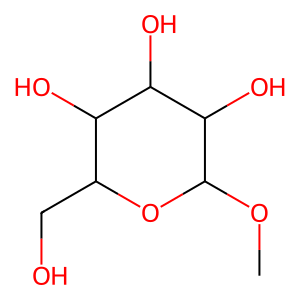

In [ ]:
smile1, name1 =     smiles_and_names[0]
from rdkit import Chem
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles(smile1)

img = Draw.MolToImage(mol)
img.show()

